In [1]:
import  torchvision as tv
import  torchvision.transforms as transforms
from torchvision.transforms import  ToPILImage
import torch as t
from torch.autograd import Variable
show = ToPILImage()

In [2]:
# 定义对数据的预处理

transform = transforms.Compose([
    transforms.ToTensor(),  # 转化为Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # 归一化
])

# 训练集

trainset = tv.datasets.CIFAR10(root='E:/DataBase/',
                               train=True,
                               download=True,
                               transform=transform)

trainloader = t.utils.data.DataLoader(trainset,
                                      batch_size=4,
                                      shuffle=True,
                                      num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(root='E:/DataBase/',
                              train=False,
                              download=True,
                              transform=transform)
testloader = t.utils.data.DataLoader(testset,
                                     batch_size=4,
                                     shuffle=False,
                                     num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog',
           'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


ship


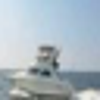

In [3]:
(data, label) = trainset[100]
print(classes[label])
show((data + 1) / 2).resize((100, 100))


      horse        deer        bird        ship


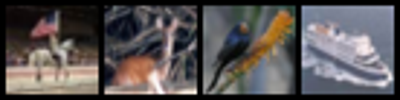

In [4]:
dataiter = iter(trainloader)
images,labels=dataiter.next() #返回四张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))



In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [6]:
#定义损失函数和优化器 loss和optimizer

from torch import optim
criterion = nn.CrossEntropyLoss() #交叉熵损失函数
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)


In [7]:
# 所有的网络的训练流程都是类似的，不断的执行如下的流程
# 1.输入数据
# 2.前向传播+反向传播
# 3.更新参数


for epoch in range(2):  # loop over the dataset multiple times 指定训练一共要循环几个epoch
    
    running_loss = 0.0  #定义一个变量方便我们对loss进行输出
    for i, data in enumerate(trainloader, 0): # 这里我们遇到了第一步中出现的trailoader，代码传入数据
                                              # enumerate是python的内置函数，既获得索引也获得数据，详见下文
        # get the inputs
        inputs, labels = data   # data是从enumerate返回的data，包含数据和标签信息，分别赋值给inputs和labels

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels) # 将数据转换成Variable，第二步里面我们已经引入这个模块
                                                            # 所以这段程序里面就直接使用了，下文会分析
        # zero the parameter gradients
        optimizer.zero_grad()                # 要把梯度重新归零，因为反向传播过程中梯度会累加上一次循环的梯度

        # forward + backward + optimize
        outputs = net(inputs)                # 把数据输进网络net，这个net()在第二步的代码最后一行我们已经定义了
        loss = criterion(outputs, labels)    # 计算损失值,criterion我们在第三步里面定义了
        loss.backward()                      # loss进行反向传播，下文详解
        optimizer.step()                     # 当执行反向传播之后，把优化器的参数进行更新，以便进行下一轮



        # print statistics                   # 这几行代码不是必须的，为了打印出loss方便我们看而已，不影响训练过程
        running_loss += loss.item()         # 从下面一行代码可以看出它是每循环0-1999共两千次才打印一次
        if i % 2000 == 1999:    # print every 2000 mini-batches   所以每个2000次之类先用running_loss进行累加
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))  # 然后再除以2000，就得到这两千次的平均损失值
            running_loss = 0.0               # 这一个2000次结束后，就把running_loss归零，下一个2000次继续使用

print('Finished Training')


[1,  2000] loss: 2.210
[1,  4000] loss: 1.833
[1,  6000] loss: 1.632
[1,  8000] loss: 1.554
[1, 10000] loss: 1.516
[1, 12000] loss: 1.468
[2,  2000] loss: 1.401
[2,  4000] loss: 1.376
[2,  6000] loss: 1.351
[2,  8000] loss: 1.338
[2, 10000] loss: 1.304
[2, 12000] loss: 1.299
Finished Training


实际的label：       cat     ship     ship    plane


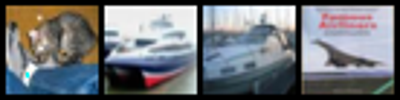

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next() #一个batch返回4张图片
print('实际的label： ', ' '.join(\
    '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 -0.5)).resize((400,100))


In [9]:
outputs = net (Variable(images))
#得分最高的那个类
_, predicted =t.max(outputs.data, 1)
print('预测结果： ', ' '.join('%5s'\
                         % classes[predicted[j]] for j in range(4)))


预测结果：    cat  ship  ship plane


In [10]:
correct = 0 #预测正确的图片数
total = 0   #总共的图片数

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total+= labels.size(0)
    correct+=(predicted == labels).sum()

print('10000张册书籍中的准确率为： %d %%' %(100* correct /total))


10000张册书籍中的准确率为： 54 %


..\aten\src\ATen\native\BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


In [11]:
# if t.cuda.is_available():
#     net.cuda()
#     images = images.cuda()
#     labels = labels.cuda()
#     outputs = net(Variable(images))
#     loss = criterion(outputs,Variable(labels))
